In [1]:
import pandas as pd
import os
from bidi.algorithm import get_display
import re

In [2]:
threads_df = None

In [3]:
type_file = 'post'

In [4]:
field_name = 'message'

In [5]:
file_name = os.listdir('data/')
for filename in file_name:
    if type_file in filename:
        temp_df = pd.read_csv(f'data/{filename}')
        if threads_df is None:
            threads_df = temp_df
        else:
            threads_df = threads_df.append(temp_df)

In [6]:
dataset = threads_df

In [7]:
dataset.head()

,Unnamed: 0,thread_id,post_id,user_name,date,message,cite1,cite2,cite3,cite4
0,0,20126916,post_202834374,רומא,21-02-2020 20:54,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,login.php?do=lostpw,login.php?do=lostpw,login.php?do=lostpw,NaN
1,1,20126916,post_202834407,רומא,21-02-2020 20:54,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,login.php?do=lostpw,login.php?do=lostpw,login.php?do=lostpw,NaN
2,2,20126916,post_202834485,רומא,21-02-2020 20:54,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,login.php?do=lostpw,login.php?do=lostpw,login.php?do=lostpw,NaN
3,3,20126916,post_202834494,רומא,21-02-2020 20:54,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,login.php?do=lostpw,login.php?do=lostpw,login.php?do=lostpw,NaN
4,4,20126916,post_202834534,רומא,21-02-2020 20:54,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,login.php?do=lostpw,login.php?do=lostpw,login.php?do=lostpw,NaN


In [8]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset[field_name].apply(lambda x: len(str(x).split(" ")))
dataset[[field_name,'word_count']].head()

,message,word_count
0,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,35
1,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,35
2,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,35
3,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,35
4,\nיש כאלה בכלל?\n \n \n \n טיס עד לגיבוש \nשח...,35


In [9]:
dataset.word_count.describe()

count    334819.000000
mean        224.657269
std         177.378942
min           1.000000
25%         110.000000
50%         186.000000
75%         290.000000
max        5242.000000
Name: word_count, dtype: float64

In [10]:
freq = pd.Series(' '.join(dataset[field_name]).split()).value_counts()[:20]
freq

לא     1935550
זה     1462097
אני    1037347
את      939085
אתה     778459
על      706923
מה      686145
אם      668095
לי      657111
אבל     585003
יש      560402
לך      558872
של      548140
עם      464913
או      434318
גם      405743
כל      381187
אז      369157
הוא     299469
כי      297944
dtype: int64

In [11]:
##Creating a list of stop words and adding custom stopwords
import codecs
with codecs.open('stopwords.txt', 'r', encoding='utf8') as f:
    text = f.read()
stop_words = set(get_display(word) for word in text.split('\r\n'))

In [12]:
corpus = []
for i in dataset[field_name]:
    #Remove FXP
    text = re.sub('- FXP', '', i)
    
    #Remove punctuations
    text = re.sub('[^א-ת]', ' ', text)
          
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #trim
    text = text.strip()
    
    #remove white space
    text = ' '.join(text.split())
    
    #bidi
    text = get_display(text)
    
    corpus.append(text)

In [13]:
corpus[:10]

['רוציקב הצור ינאש וא הזה בלשב יילא יטנוולרש והשמ אל הדות הבבס םיסייגתמ לש רתאהמ קבדה קתעה יתישע ןמח ללכ אמאג םיקחש ליחה גרדמב אמאג םיקחש שוביגל דע סיט ללכב הלאכ שי',
 'רוציקב הצור ינאש וא הזה בלשב יילא יטנוולרש והשמ אל הדות הבבס םיסייגתמ לש רתאהמ קבדה קתעה יתישע ןמח ללכ אמאג םיקחש ליחה גרדמב אמאג םיקחש שוביגל דע סיט ללכב הלאכ שי',
 'רוציקב הצור ינאש וא הזה בלשב יילא יטנוולרש והשמ אל הדות הבבס םיסייגתמ לש רתאהמ קבדה קתעה יתישע ןמח ללכ אמאג םיקחש ליחה גרדמב אמאג םיקחש שוביגל דע סיט ללכב הלאכ שי',
 'רוציקב הצור ינאש וא הזה בלשב יילא יטנוולרש והשמ אל הדות הבבס םיסייגתמ לש רתאהמ קבדה קתעה יתישע ןמח ללכ אמאג םיקחש ליחה גרדמב אמאג םיקחש שוביגל דע סיט ללכב הלאכ שי',
 'רוציקב הצור ינאש וא הזה בלשב יילא יטנוולרש והשמ אל הדות הבבס םיסייגתמ לש רתאהמ קבדה קתעה יתישע ןמח ללכ אמאג םיקחש ליחה גרדמב אמאג םיקחש שוביגל דע סיט ללכב הלאכ שי',
 'הדיחיה לע םירבד המכ דועו םירישכמ יאבור תמר הזיא איה הפיא תונוריטה לע רפסל לוכי םש היהש והשימו ההובג תופידעב ןמסל קר וא הדיחיל לבקתהל ידכ ןוכנ םינחבמה לוכ לע תונעל 

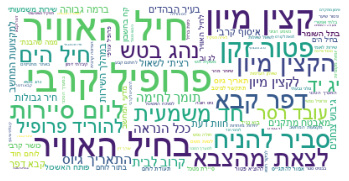

In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42,
                          font_path='C:/WINDOWS/Fonts/Arial.ttf'
                         ).generate(' '.join(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

In [15]:
new_corpus = list()
for sentence in corpus:
    new_corpus.append(' '.join([word for word in sentence.split() if not word in stop_words]))

In [16]:
corpus = new_corpus

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(new_corpus)

In [18]:
list(cv.vocabulary_.keys())[:10]

['רוציקב',
 'יילא',
 'םיסייגתמ',
 'יתישע',
 'ןמח',
 'אמאג',
 'םיקחש',
 'ליחה',
 'שוביגל',
 'סיט']

[Text(0, 0, 'ליפורפ'),
 Text(0, 0, 'יברק'),
 Text(0, 0, 'דיקפת'),
 Text(0, 0, 'ןוימ'),
 Text(0, 0, 'םחול'),
 Text(0, 0, 'תאצל'),
 Text(0, 0, 'ריכמ'),
 Text(0, 0, 'יתלביק'),
 Text(0, 0, 'ןיבמ'),
 Text(0, 0, 'סיסבב'),
 Text(0, 0, 'רוטפ'),
 Text(0, 0, 'דיקפתה'),
 Text(0, 0, 'סויג'),
 Text(0, 0, 'התאו'),
 Text(0, 0, 'שדוח'),
 Text(0, 0, 'םשל'),
 Text(0, 0, 'ארח'),
 Text(0, 0, 'ליח'),
 Text(0, 0, 'רובעל'),
 Text(0, 0, 'םידיקפת')]

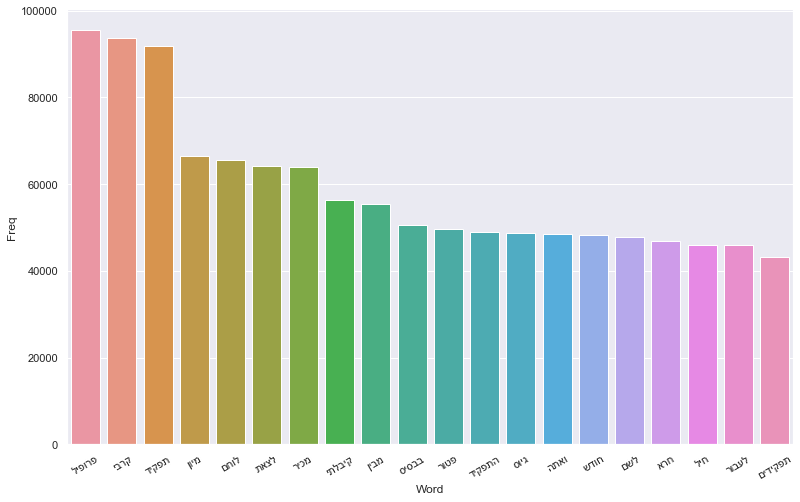

In [19]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

          Bi-gram   Freq
0      ריוואה ליח  15053
1     יברק ליפורפ  13976
2     ריוואה ליחב  10567
3       ןוימ ןיצק  10395
4        ןקז רוטפ   6373
5      חינהל ריבס   5712
6         אבק רפד   5590
7     תורייס םויל   5307
8      ןוימ ןיצקה   5249
9      אבצהמ תאצל   5175
10      תיעמשמ דח   5166
11        םיה ליח   5070
12        שטב גהנ   5020
13  ליפורפ דירוהל   4949
14          די גי   4852
15       רסר דבוע   4820
16    סויג ךיראתה   4689
17     ןוימ ןיצקל   4677
18     המיחל ךמות   4493
19      תיבל בורק   4324


[Text(0, 0, 'ריוואה ליח'),
 Text(0, 0, 'יברק ליפורפ'),
 Text(0, 0, 'ריוואה ליחב'),
 Text(0, 0, 'ןוימ ןיצק'),
 Text(0, 0, 'ןקז רוטפ'),
 Text(0, 0, 'חינהל ריבס'),
 Text(0, 0, 'אבק רפד'),
 Text(0, 0, 'תורייס םויל'),
 Text(0, 0, 'ןוימ ןיצקה'),
 Text(0, 0, 'אבצהמ תאצל'),
 Text(0, 0, 'תיעמשמ דח'),
 Text(0, 0, 'םיה ליח'),
 Text(0, 0, 'שטב גהנ'),
 Text(0, 0, 'ליפורפ דירוהל'),
 Text(0, 0, 'די גי'),
 Text(0, 0, 'רסר דבוע'),
 Text(0, 0, 'סויג ךיראתה'),
 Text(0, 0, 'ןוימ ןיצקל'),
 Text(0, 0, 'המיחל ךמות'),
 Text(0, 0, 'תיבל בורק')]

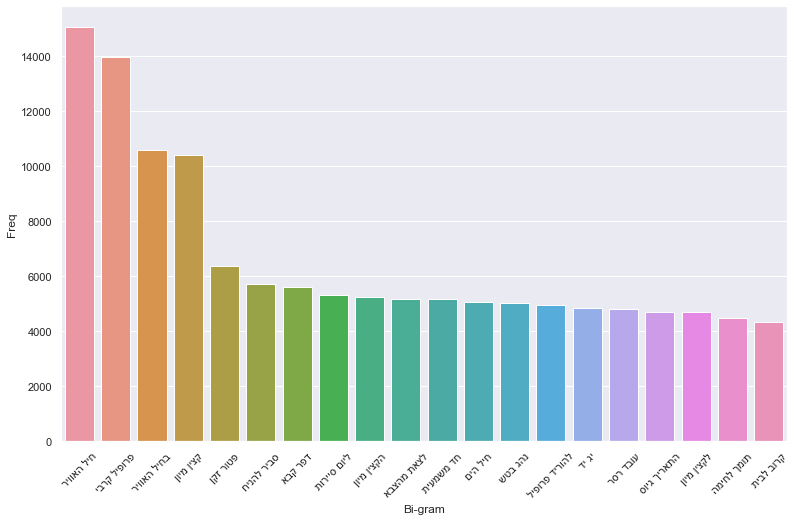

In [20]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                  Tri-gram  Freq
0          רוחב ריכמש רוחב  1410
1         ריכמש רוחב ריכמש  1395
2           ליפורפ אבק רפד  1285
3         ריוואה ליח ינכטה  1191
4           רפד אבק ליפורפ   989
5        ינלוג ינלוג ינלוג   960
6   הקזחאהו היגולונכטה ליח   867
7         בשחמה יעדמב ראות   862
8           ליפורפ רפד אבק   793
9            עגמ ברק ךירדמ   764
10     בשחמה תועוצקמל ןוימ   746
11              בו גל תדרל   669
12          אבק רפד ליפורפ   658
13           ךורב ורכז יהי   653
14         ןקז רוטפ איצוהל   630
15          ןוימ ןיצק הארת   630
16             דבכ אשמ גהנ   617
17        תיקוח יתלב הדוקפ   590
18         לחנ יתעבג ינלוג   566
19           רבג ןידכ השיא   558


[Text(0, 0, 'רוחב ריכמש רוחב'),
 Text(0, 0, 'ריכמש רוחב ריכמש'),
 Text(0, 0, 'ליפורפ אבק רפד'),
 Text(0, 0, 'ריוואה ליח ינכטה'),
 Text(0, 0, 'רפד אבק ליפורפ'),
 Text(0, 0, 'ינלוג ינלוג ינלוג'),
 Text(0, 0, 'הקזחאהו היגולונכטה ליח'),
 Text(0, 0, 'בשחמה יעדמב ראות'),
 Text(0, 0, 'ליפורפ רפד אבק'),
 Text(0, 0, 'עגמ ברק ךירדמ'),
 Text(0, 0, 'בשחמה תועוצקמל ןוימ'),
 Text(0, 0, 'בו גל תדרל'),
 Text(0, 0, 'אבק רפד ליפורפ'),
 Text(0, 0, 'ךורב ורכז יהי'),
 Text(0, 0, 'ןקז רוטפ איצוהל'),
 Text(0, 0, 'ןוימ ןיצק הארת'),
 Text(0, 0, 'דבכ אשמ גהנ'),
 Text(0, 0, 'תיקוח יתלב הדוקפ'),
 Text(0, 0, 'לחנ יתעבג ינלוג'),
 Text(0, 0, 'רבג ןידכ השיא')]

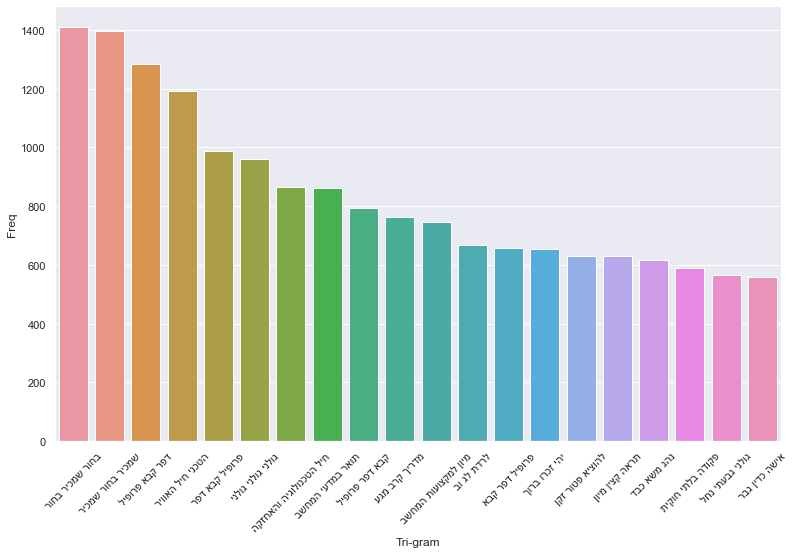

In [21]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [23]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
רפדה יתישעש השקבה ולביק ןוחבא יתישע תכראה יתייהש תירקיעה הביסה יתרפיש תחלש רפדה המכו תשמתשה תוביס תחלשש השקבה חלוש רזוחב תלביק הסנת ולביק ופוסבו המכרזוח רפדל השקבה וחד יתרפישו םינותנ םיכומנ ולאכ םינותנ יתלביק םיכומנ םייוכיסה יתנבהש הסנא לבקתהל םייוכיסה תולעהל ליפורפ דירוהל רזוח רפד גישהל תוסנל ץילממ עמשת יתעד ןומיז לבקמ רפדב ספספמ סלכת םינותנ ןימטיו רתי תנמ רוזעי ילואש ןומיז שדוח ינפלמ וצ יתישע לנכ איב גירחכ ןומיז תוסנל הסנת דיספהל םיכומנ םייוכיסה גירח תשקב שקבל ןומיז לבקא יוכיס לבקמ תוסנל תיצחמ עצוממ ימוחת ברב עצוממ רזוח רפד גישהל תוסנל רוגס

Keywords:
ןומיז 0.284
השקבה 0.284
םיכומנ 0.277
תוסנל 0.257
םינותנ 0.207
